# K means clustering på bildepiksler 

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import seaborn
%matplotlib notebook

seaborn.set_style("whitegrid", {'axes.grid' : False})

## Lese inn bildet
Først bruker vi scipy til å lese bilde og viser det frem med imshow

<IPython.core.display.Javascript object>


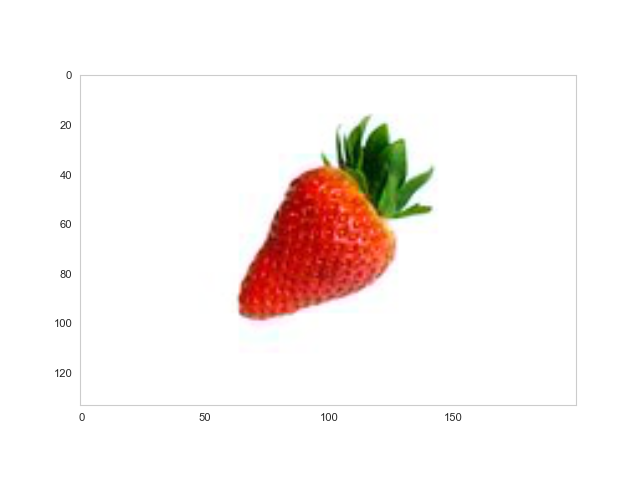

In [2]:
#image = misc.imread('../datasets/bilder/cat2_small.jpeg')
image = misc.imread('../datasets/bilder/strawberry.jpeg')
#image = misc.imread('../datasets/bilder/smile2.jpg')

#image = misc.imread('../datasets/bilder/smile.jpeg')
plt.imshow(image)
plt.show()

## Reshape
For å bruke pikslene som egenskaper for en maskinlæringsalgoritme må vi først "rulle ut" bilde slik at alle pikslene ligger etter hverandre i en lang liste. Hver piksel har tre kanaler (RGB)

In [3]:
features = np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2]))
print "Ny data dimensjon:"
print features.shape

Ny data dimensjon:
(26600L, 3L)


## Scatterplot
La oss plotte pikslene i et 3 dimensjonalt scatterplot

<IPython.core.display.Javascript object>


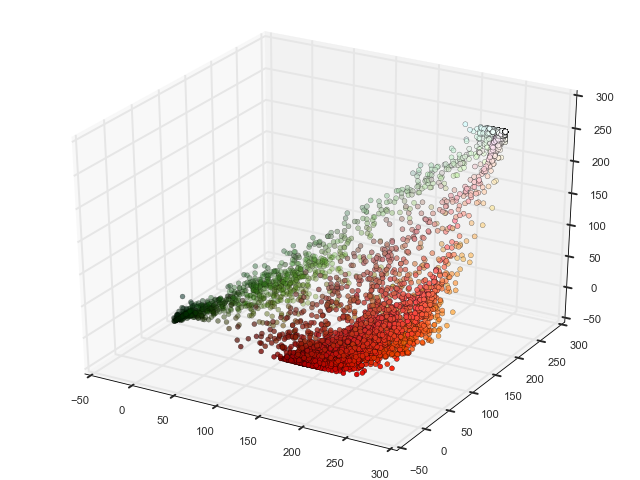

In [4]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(features[:,0], features[:,1], features[:,2],facecolors = features/255.)
plt.show()

## K means clustering med 3 clustere

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=10, max_iter=10, n_init=1,init='random')
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=10,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

Når vi fullført clusteringen kan vi plotte clustersenterne

<IPython.core.display.Javascript object>


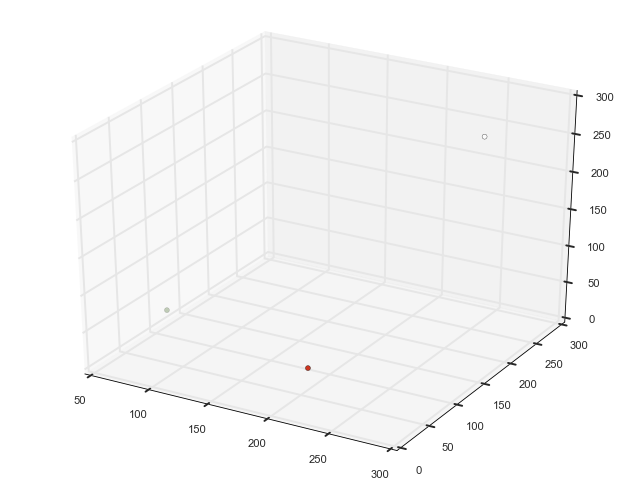

In [6]:
cc = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(cc[:,0], cc[:,1], cc[:,2],facecolors = cc/255.)
plt.show()

Vi kan nå finne hvilket cluster hver piksel hører til

In [7]:
labels = kmeans.predict(features)

In [8]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


Og gjennskape bildet med færre farger

<IPython.core.display.Javascript object>


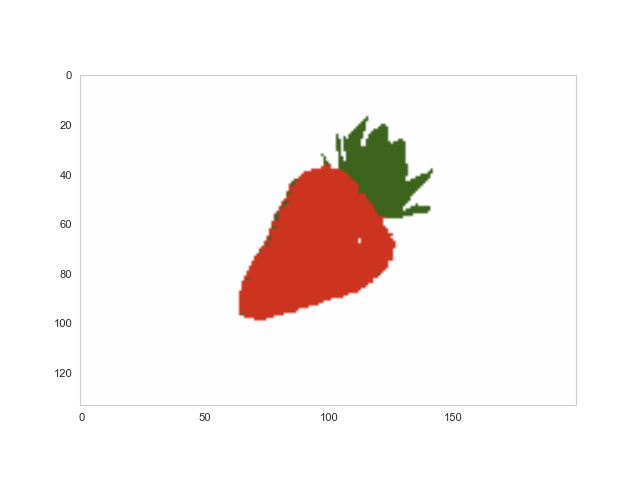

In [9]:
w,h,_ = image.shape

new_image = recreate_image(kmeans.cluster_centers_, labels, w, h)/255.

plt.figure()
plt.imshow(new_image)
plt.show()

Vi kan også se på clusterene våre i et nytt scatterplott

<IPython.core.display.Javascript object>


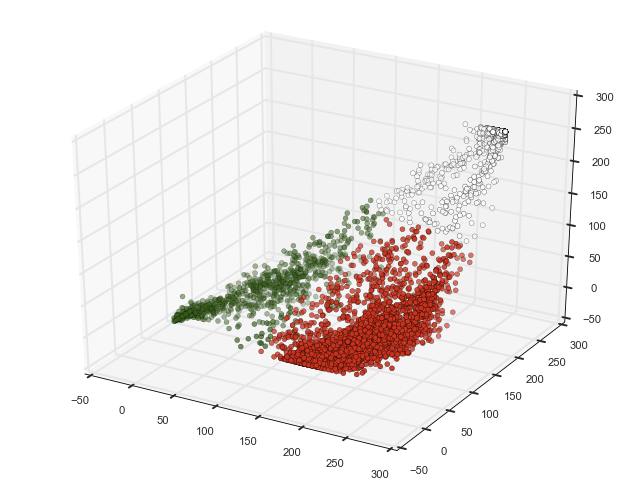

In [10]:
new_features = np.reshape(new_image, (image.shape[0]*image.shape[1], image.shape[2]))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(features[:,0], features[:,1], features[:,2],facecolors = new_features)
plt.show()